# Grupo 21: Thiago e Gabriele

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing
from sklearn import cluster

In [2]:
df = pd.read_csv('trabalho5_dados_20.csv')

In [3]:
df

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
0,9669,388.606995,151.438461,83.590904,0.833858,10012,0.733890
1,12975,463.851013,196.423965,85.064117,0.901363,13358,0.609126
2,15161,498.790985,208.252045,93.860260,0.892673,15541,0.640570
3,11793,417.160004,163.043839,93.501099,0.819225,12022,0.661710
4,14960,482.140015,199.543976,96.218201,0.876066,15149,0.611861
...,...,...,...,...,...,...,...
1138,13315,476.203003,205.188614,83.061020,0.914404,13510,0.551574
1139,13002,472.473999,198.077271,85.799171,0.901317,13432,0.694737
1140,10412,408.720001,163.752914,82.414291,0.864121,10735,0.689308
1141,12331,441.440002,175.609924,90.825432,0.855865,12617,0.619399


In [4]:
df.describe()

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,12658.894138,454.498840,189.051254,86.121164,0.887839,12945.679790,0.658682
std,1744.694334,35.739101,17.554676,5.631057,0.020007,1786.314499,0.077419
min,8501.000000,371.024994,151.438461,67.695343,0.816083,8738.000000,0.497413
25%,11353.000000,425.818008,174.266548,82.645897,0.874126,11615.500000,0.597611
50%,12405.000000,448.839996,186.107849,86.146309,0.890264,12659.000000,0.638173
75%,13959.000000,483.822495,203.602448,90.012150,0.903069,14283.000000,0.721851
max,17856.000000,548.445984,239.010498,102.901276,0.948007,18062.000000,0.861050


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            1143 non-null   int64  
 1   perimetro       1143 non-null   float64
 2   maior-eixo      1143 non-null   float64
 3   menor-eixo      1143 non-null   float64
 4   arredondamento  1143 non-null   float64
 5   area-convexa    1143 non-null   int64  
 6   extensao        1143 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 62.6 KB


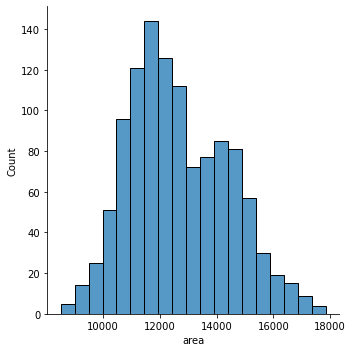

In [6]:
sns.displot(df['area'])

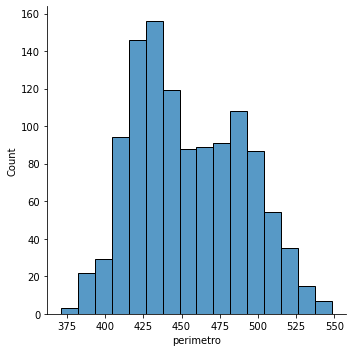

In [7]:
sns.displot(df['perimetro'])

In [10]:
df.corr()

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
area,1.000000,0.967621,0.910016,0.797172,0.374845,0.998988,-0.029267
perimetro,0.967621,1.000000,0.974633,0.644938,0.561282,0.971151,-0.103465
maior-eixo,0.910016,0.974633,1.000000,0.480290,0.716767,0.910753,-0.118685
menor-eixo,0.797172,0.644938,0.480290,1.000000,-0.253445,0.796271,0.098955
arredondamento,0.374845,0.561282,0.716767,-0.253445,1.000000,0.376175,-0.206128
area-convexa,0.998988,0.971151,0.910753,0.796271,0.376175,1.000000,-0.033563
extensao,-0.029267,-0.103465,-0.118685,0.098955,-0.206128,-0.033563,1.000000


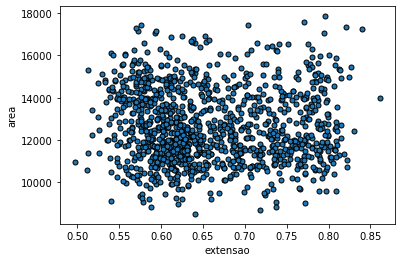

In [32]:
y= 0
x=6
plt.scatter( df.iloc[:,x], df.iloc[:, y], marker="o", s=25, edgecolor="k" )
plt.xlabel(df.keys()[x])
plt.ylabel(df.keys()[y])
# plt.legend()
plt.show()

In [48]:
df.shape

(1143, 7)

## Aplicando o PCA


Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. 

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
# pca = PCA(n_components=None, random_state=42)
X_reduced= pca.fit_transform(df)
X_reduced.shape

(1143, 1)

In [50]:
X_reduced

array([[-4188.50268563],
       [  515.95587969],
       [ 3605.27594621],
       ...,
       [-3151.89000309],
       [ -464.44600099],
       [-2712.51013942]])

In [62]:
np.array(df)

array([[9.66900000e+03, 3.88606995e+02, 1.51438461e+02, ...,
        8.33857775e-01, 1.00120000e+04, 7.33889937e-01],
       [1.29750000e+04, 4.63851013e+02, 1.96423965e+02, ...,
        9.01363254e-01, 1.33580000e+04, 6.09126329e-01],
       [1.51610000e+04, 4.98790985e+02, 2.08252045e+02, ...,
        8.92672896e-01, 1.55410000e+04, 6.40569568e-01],
       ...,
       [1.04120000e+04, 4.08720001e+02, 1.63752914e+02, ...,
        8.64120841e-01, 1.07350000e+04, 6.89308167e-01],
       [1.23310000e+04, 4.41440002e+02, 1.75609924e+02, ...,
        8.55864644e-01, 1.26170000e+04, 6.19399250e-01],
       [1.07670000e+04, 4.28351990e+02, 1.81782303e+02, ...,
        9.08671975e-01, 1.10020000e+04, 6.99155867e-01]])

## K-means

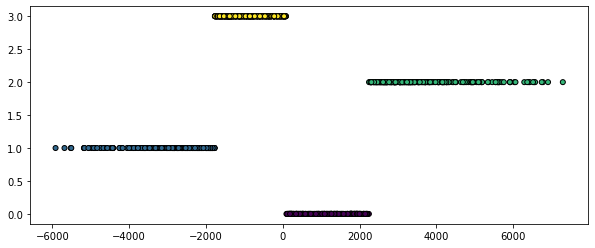

In [72]:
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans( n_clusters=4, batch_size=10)
y_kmeans = kmeans.fit_predict(X_reduced)

plt.figure(figsize=(10,4))
plt.scatter(X_reduced, y_kmeans,marker="o", c=y_kmeans, s=25, edgecolor="k" )
plt.show()

In [74]:
set(kmeans.labels_)

{0, 1, 2, 3}

## Optics

In [ ]:
modelo = cluster.OPTICS( min_samples=10, max_eps=0.2, xi=0.2 )
y_predito = modelo.fit_predict(X_reduced)

space = np.arange(len(X_reduced))
reachability = modelo.reachability_[ modelo.ordering_ ]
labels = modelo.labels_[ modelo.ordering_ ]

colors = [ "b.", "y.", "r.", "g.", "c." ]
for klass, color in zip( range(0, 5), colors ):
  Xk = space[ labels == klass ]
  Rk = reachability[ labels==klass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.3 )

plt.show()

print(set(labels))

plt.scatter( xl[:, 0], xl[:, 1], marker="o", c=y_predito, s=25, edgecolor="k" )
plt.show()